##### FIrst we sample our data

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [108]:
data = pd.read_csv('cleansedData.csv')
data.columns

Index(['SOURCE MATERIAL', 'BINDER(Kg/m^3)', 'FLY-ASH %', 'SLAG %',
       'rest period hours', 'CURING TEMPERATURE', 'CURING PERIOD',
       'NaOH/Na2SiO3', 'superplasticizer', 'extra water added', 'MOLARITY',
       'ALKALINE ACTIVATOR /BINDER RATIO', 'COMPRESSIVE STRENGTH (MPa)'],
      dtype='object')

In [109]:
X = data[['BINDER(Kg/m^3)', 'FLY-ASH %',
       'rest period hours', 'CURING TEMPERATURE', 'CURING PERIOD',
       'NaOH/Na2SiO3', 'superplasticizer', 'extra water added', 'MOLARITY',
       'ALKALINE ACTIVATOR /BINDER RATIO']]
Y = data['COMPRESSIVE STRENGTH (MPa)']

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

#### Prediction vs Actual comparision function

In [112]:
from sklearn import metrics

def Compare(prediction, actual):
    """
    1.Calculates error,
    2.Draws distribution plot of error (prediction - actual)
    3.Plots error along the index
    """
    print('The original values ranges from ', actual.min(), ' to ', actual.max())
    print('Mean Absolute Error: ', metrics.mean_absolute_error(actual, prediction))
    print('Mean Sqared Error: ', metrics.mean_squared_error(actual, prediction))
    print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(actual, prediction)))
    
    fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (7, 10))
    
    sns.distplot(prediction - actual, bins=len(actual), ax = axes[0])
    axes[0].set_title('Distribution of Error')
    axes[0].set_xlabel('Error')
    
    axes[1].plot(range(len(actual)), prediction - actual, ls='--', marker='o')
    axes[1].plot(range(len(actual)), [0]*len(actual) )
    axes[1].set_title('Error along the records')
    axes[1].set_ylabel('Error')
    axes[1].set_xlabel('index')

## Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lm = LinearRegression()

In [115]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
lm.intercept_

26.099067520468832

In [117]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

,Coefficient
BINDER(Kg/m^3),0.029370
FLY-ASH %,-32.742375
rest period hours,0.004951
CURING TEMPERATURE,0.233189
CURING PERIOD,0.190524
NaOH/Na2SiO3,-4.891368
superplasticizer,0.490279
extra water added,-0.116783
MOLARITY,1.147365
ALKALINE ACTIVATOR /BINDER RATIO,-3.995143


In [118]:
lrPredictions = lm.predict(X_test)

The original values ranges from  7.8  to  89.6
Mean Absolute Error:  10.291166410574125
Mean Sqared Error:  162.65284589382935
Root Mean Squared Error:  12.753542484103361


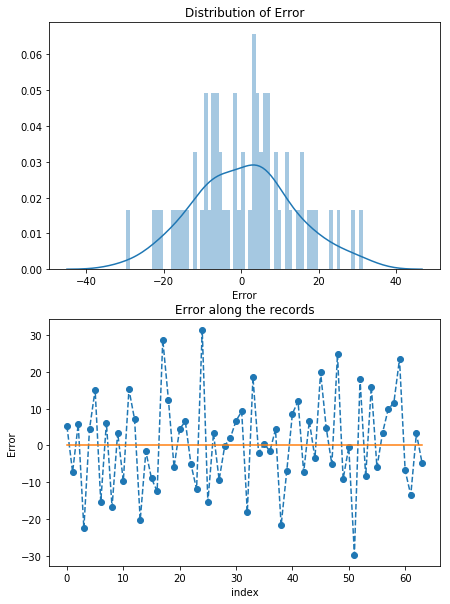

In [119]:
Compare(lrPredictions, Y_test)

#### Let's see if standardization makes any difference.

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [122]:
pd.DataFrame(scaled_X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.186240,0.491218,1.15314,0.199052,-0.613866,-0.38114,1.144563,-0.56927,-1.178741,0.265739
1,-0.229178,0.491218,1.15314,0.559514,-0.613866,-0.38114,1.004880,-0.56927,-1.178741,0.265739
2,-0.644596,0.491218,1.15314,0.919976,-0.613866,-0.38114,0.865198,-0.56927,-1.178741,0.265739
3,-1.060014,0.491218,1.15314,1.280438,-0.613866,-0.38114,0.725516,-0.56927,-1.178741,0.265739
4,-1.475432,0.491218,1.15314,1.640900,-0.613866,-0.38114,0.585834,-0.56927,-1.178741,0.265739


In [123]:
sX_train, sX_test, sY_train, sY_test = train_test_split(scaled_X, Y, test_size=0.2)

In [124]:
lm2 = LinearRegression()

In [125]:
lm2.fit(sX_train, sY_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
lm2.intercept_

37.71916055040019

In [127]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']) #turns out to be the same :/

,Coefficient
BINDER(Kg/m^3),0.029370
FLY-ASH %,-32.742375
rest period hours,0.004951
CURING TEMPERATURE,0.233189
CURING PERIOD,0.190524
NaOH/Na2SiO3,-4.891368
superplasticizer,0.490279
extra water added,-0.116783
MOLARITY,1.147365
ALKALINE ACTIVATOR /BINDER RATIO,-3.995143


In [128]:
lr2_predictions = lm2.predict(sX_test)

The original values ranges from  2.0  to  66.6
Mean Absolute Error:  7.576993390496313
Mean Sqared Error:  90.14145471513004
Root Mean Squared Error:  9.494285371481627


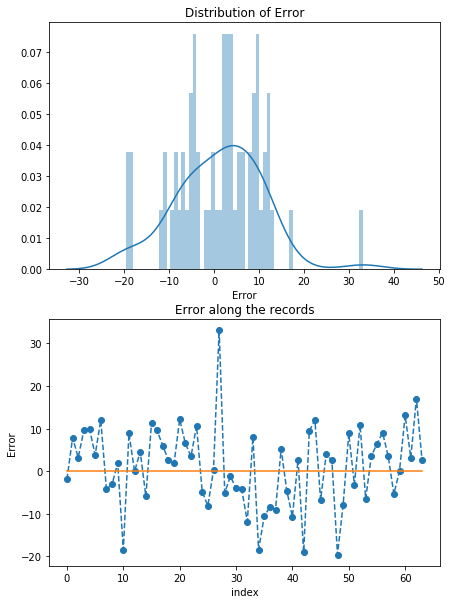

In [129]:
Compare(lr2_predictions, sY_test)





### 2. Decision Tree

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
dtree = DecisionTreeRegressor()

In [132]:
dtree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [133]:
dtree_pred = dtree.predict(X_test)

The original values ranges from  7.8  to  89.6
Mean Absolute Error:  8.525156249999998
Mean Sqared Error:  177.3437390625
Root Mean Squared Error:  13.317046934756219


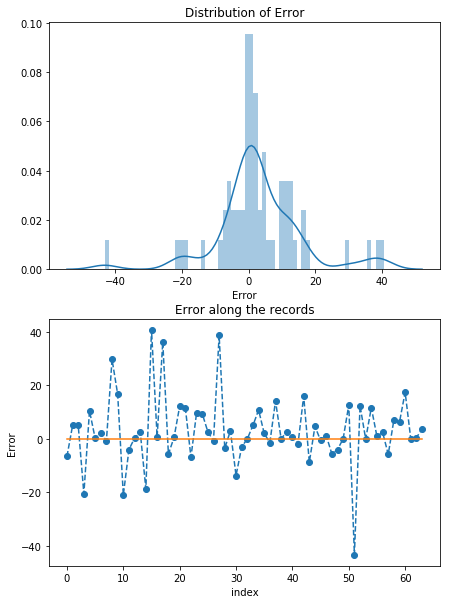

In [134]:
Compare(dtree_pred, Y_test)

### 3. Random forest 

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
rfr = RandomForestRegressor(n_estimators=200)

In [137]:
rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [138]:
rfr_pred = rfr.predict(X_test)

The original values ranges from  7.8  to  89.6
Mean Absolute Error:  5.661444252232133
Mean Sqared Error:  81.89683850760137
Root Mean Squared Error:  9.04968720495915


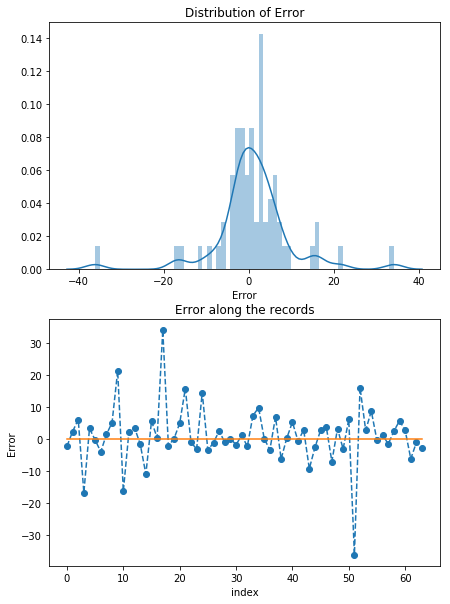

In [139]:
Compare(rfr_pred, Y_test)

### 4. GBT

In [140]:
from sklearn.ensemble import GradientBoostingRegressor

In [141]:
gbr = GradientBoostingRegressor()

In [142]:
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [143]:
gbr_pred = gbr.predict(X_test)

The original values ranges from  7.8  to  89.6
Mean Absolute Error:  6.252547012682774
Mean Sqared Error:  83.9467253996261
Root Mean Squared Error:  9.162244561221126


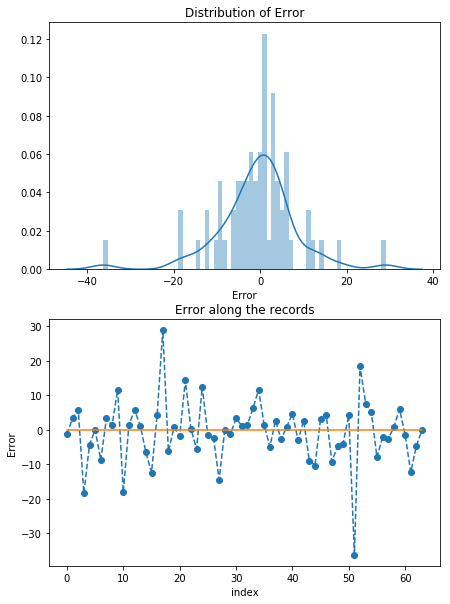

In [144]:
Compare(gbr_pred, Y_test)

### 5. SGD Regressor
Not expecting it to work

In [145]:
from sklearn.linear_model import SGDRegressor

In [146]:
sgdr = SGDRegressor()

In [147]:
sgdr.fit(sX_train, sY_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [148]:
sgdr_pred = sgdr.predict(sX_test)

The original values ranges from  2.0  to  66.6
Mean Absolute Error:  7.719218959849222
Mean Sqared Error:  100.27648613137461
Root Mean Squared Error:  10.013814764183259


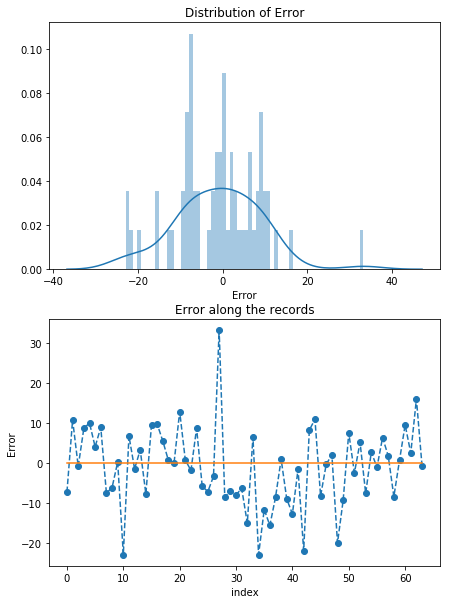

In [149]:
Compare(sgdr_pred, sY_test)

### 6. KNN regressor

In [150]:
from sklearn.neighbors import KNeighborsRegressor

In [151]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [152]:
knn_pred = knn.predict(X_test)

The original values ranges from  7.8  to  89.6
Mean Absolute Error:  8.79953125
Mean Sqared Error:  133.62645856249998
Root Mean Squared Error:  11.559691110168124


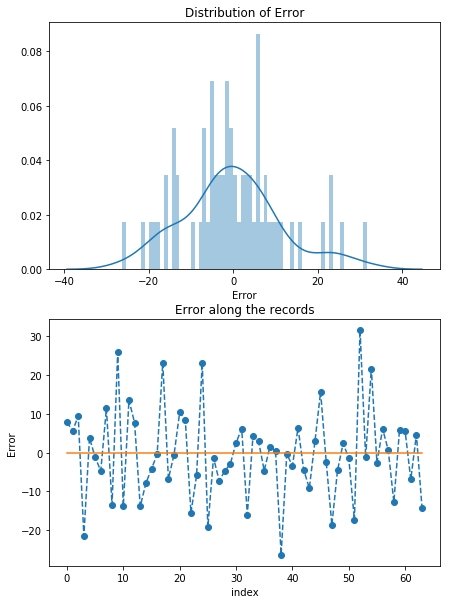

In [153]:
Compare(knn_pred, Y_test)